<a href="https://colab.research.google.com/github/RuwanthiLakshika/Regression-with-TensorFlow/blob/main/regression_after_tunning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install opendatasets

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import opendatasets as od

In [3]:
od.download("https://raw.githubusercontent.com/RuwanthiLakshika/Regression-with-TensorFlow/main/dataset.csv")

8192it [00:00, 260601.13it/s]


In [10]:
data=pd.read_csv('dataset.csv')

In [11]:
data.head()

,x,y
0,77,79.775152
1,21,23.177279
2,22,25.609262
3,20,17.857388
4,36,41.849864


In [12]:
data.shape

(300, 2)

In [13]:
x=data['x']
y=data['y']


In [14]:
x

0      77
1      21
2      22
3      20
4      36
       ..
295    71
296    46
297    55
298    62
299    47
Name: x, Length: 300, dtype: int64

In [15]:
y

0      79.775152
1      23.177279
2      25.609262
3      17.857388
4      41.849864
         ...    
295    68.545888
296    47.334876
297    54.090637
298    63.297171
299    52.459467
Name: y, Length: 300, dtype: float64

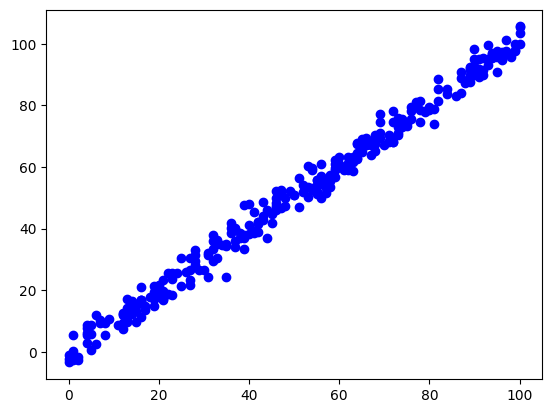

In [16]:
plt.scatter(x,y,c='b')
plt.show()

In [17]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [18]:
x_train.shape, x_test.shape

((240,), (60,))

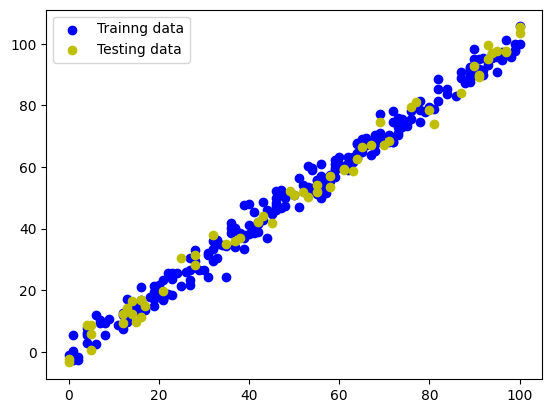

In [19]:
plt.scatter(x_train,y_train,c='b',label='Trainng data')
plt.scatter(x_test,y_test,c='y',label='Testing data')
plt.legend()
plt.show()

## Model Building

In [37]:
#create a model
model=tf.keras.Sequential([
    tf.keras.layers.Dense(64,input_shape=(1,)),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

#compile model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(lr=0.05),
              metrics=['mae'])

#train model
epoch_number=10
model.fit(tf.expand_dims(x_train,axis=1),y_train,epochs=epoch_number)

Epoch 1/10
8/8 [==============================] - 1s 2ms/step - loss: 62.0321 - mae: 62.0321
Epoch 2/10
8/8 [==============================] - 0s 2ms/step - loss: 43.2234 - mae: 43.2234
Epoch 3/10
8/8 [==============================] - 0s 2ms/step - loss: 24.0833 - mae: 24.0833
Epoch 4/10
8/8 [==============================] - 0s 2ms/step - loss: 6.0515 - mae: 6.0515
Epoch 5/10
8/8 [==============================] - 0s 3ms/step - loss: 7.1154 - mae: 7.1154
Epoch 6/10
8/8 [==============================] - 0s 3ms/step - loss: 3.5365 - mae: 3.5365
Epoch 7/10
8/8 [==============================] - 0s 3ms/step - loss: 3.3467 - mae: 3.3467
Epoch 8/10
8/8 [==============================] - 0s 3ms/step - loss: 3.0536 - mae: 3.0536
Epoch 9/10
8/8 [==============================] - 0s 3ms/step - loss: 2.5895 - mae: 2.5895
Epoch 10/10
8/8 [==============================] - 0s 3ms/step - loss: 2.5349 - mae: 2.5349


In [38]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 64)                128       
                                                                 
 dense_9 (Dense)             (None, 10)                650       
                                                                 
 dense_10 (Dense)            (None, 1)                 11        
                                                                 
Total params: 789 (3.08 KB)
Trainable params: 789 (3.08 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [39]:
y_predictions=model.predict(x_test)
y_predictions[:5]

2/2 [==============================] - 0s 7ms/step


array([[90.67047 ],
       [76.634415],
       [94.680786],
       [ 5.451534],
       [91.67305 ]], dtype=float32)

In [40]:
y_test.head(5)

203    92.887723
266    79.503415
152    97.001484
9       8.746748
233    89.739520
Name: y, dtype: float64

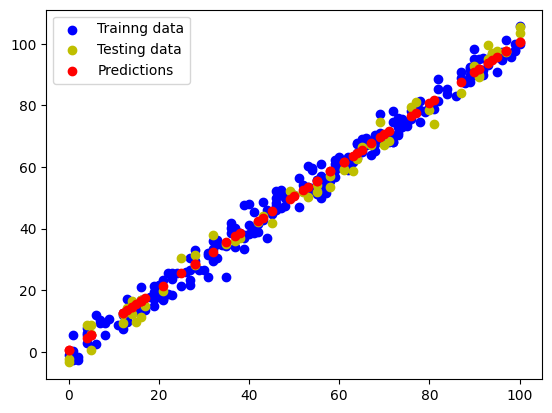

In [41]:
plt.scatter(x_train,y_train,c='b',label='Trainng data')
plt.scatter(x_test,y_test,c='y',label='Testing data')
plt.scatter(x_test,y_predictions,c='r',label='Predictions')
plt.legend()
plt.show()

In [42]:
model.evaluate(x_test,y_test)

2/2 [==============================] - 0s 9ms/step - loss: 2.5729 - mae: 2.5729


[2.572864294052124, 2.572864294052124]

In [43]:
#Using MAE (Mean Absolute Error)
mae=tf.metrics.mean_absolute_error(y_test,tf.squeeze(y_predictions))
mae

<tf.Tensor: shape=(), dtype=float32, numpy=2.5728643>

In [44]:
#Using MSE(Mean Squared Error)
mse=tf.metrics.mean_squared_error(y_test,tf.squeeze(y_predictions))
mse

<tf.Tensor: shape=(), dtype=float32, numpy=9.654179>